# Chapter 1. Exploratory Data Analysis

---

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## Estimaciónes de Ubicación

In [3]:
df = pd.read_csv("D:/Documentos/Python for Data Projects/datos_practical_statistics/state.csv")

In [5]:
df.head()

State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA

### Media/Mean
Promedio de los valores. A este valor se le conoce como "x-barra".

In [6]:
df.Population.mean()

6162876.3

### Media recortada/Trimmed mean
Es el promedio de los datos omitiendo los mayores y menores valores. Se trata de evitar contar valores extremos. Por ejemplo, en la competencia de clavados internacionales, se quitan los valores mayor y menor, para evitar que un juez haya votado a bajo un sezgo personal a favor de su país. "Para la mayoría de los usos en estadística se elimina entre el 5 al 25% de los elementos de la muestra en los extremos". (Wikipedia)

In [9]:
stats.trim_mean(df.Population, 0.05)

5316411.543478261

### Media ponderada/Weighted mean
Es una media en donde un conjunto de datos tiene más relevancia que otros. Como cuando en la universidad ponderaban tu calificación final con base a tus tareas, exámenes, quizes, que todos tenian un porcentaje asignado que ayudaba a sacar la calificación final.

In [ ]:
### using formula
#wm_formula = (df['a']*df['b']).sum()/df['b'].sum()
 
### using numpy average() method
#wm_numpy = np.average(df['a'], weights=df['b'])

In [ ]:
#https://pbpython.com/weighted-average.html Ejemplos de media ponderada con groupby

In [ ]:
#función para utilizar media ponderada en un groupby:
def wavg(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

#wavg(sales, "Current_Price", "Quantity")
#sales.groupby("Manager").apply(wavg, "Current_Price", "Quantity")

### Mediana/Median
El valor que se localiza en el medio de una lista ordenada de los datos. Esta medida sirve mucho, por ejemplo, cuando se necesita sacar el valor promedio de los ingresos de una colonia vs otra colonia. Que tal si en una colonia vive Carlos Slim y en la otra no, el sezgo va ser enorme.
La mediana es una medida de estimación eficaz para evitar outliers, sin embargo, hay que analizar bien el contexto del problema para ver si es conveniente o no evitar outliers, ya que hay veces que los outliers no son siempre datos invaluables.

In [10]:
df.Population.median()

4436369.5

## Estimaciónes de Variabilidad o Dispersión
¿Acaso los datos estan muy unidos o separados/repartidos por doquier?

### Desviación absoluta media/Mean absolute deviation
El promedio absoluto de la suma de desviaciones de un conjunto de datos. 

In [15]:
df['Murder.Rate'].mad()

1.5526400000000005

### Varianza/Variance
Basada en el cuadrado de las desviaciones

In [16]:
df['Murder.Rate'].var()

3.670044897959184

### Desviación Estándar/Standard deviation
La raíz cuadrada de la varianza

In [17]:
df['Murder.Rate'].std()

1.915736124302923

#### Notas: 	
- "mathematically,	working	with	squared	values	is	much	more	convenient than	absolute	values,	especially	for	statistical	models". ¿Por qué? No lo sé...
- Ninguna de las tres anteriores es robusta contra los outliers, ya que realmente se toman todos los datos en cuenta.

### Desviación absoluta mediana/Median absolute deviation

In [19]:
stats.median_absolute_deviation(df['Murder.Rate'])

2.372159999999999

### Percentiles
- Rango: el valor maximo menos el mínimo. Sensible a outliers
- Rango intercuartílico: cuartil75 - cuartil25
    - Primer cuartil (Q1) como la mediana de la primera mitad de valores;
    - Segundo cuartil (Q2) como la propia mediana de la serie;
    - Tercer cuartil (Q3) como la mediana de la segunda mitad de valores.

## Distribución de los datos

### Diagrama de caja/Boxplot

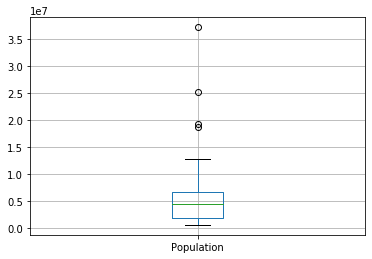

In [25]:
df.boxplot(['Population'])
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

#The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). 
#The whiskers extend from the edges of box to show the range of the data. 
#The position of the whiskers is set by default to 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box. 
#Outlier points are those past the end of the whiskers.

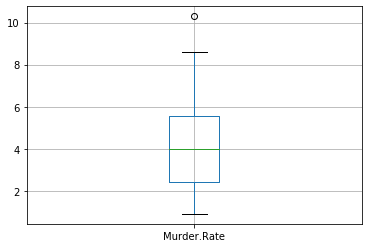

In [35]:
df.boxplot(['Murder.Rate'])

In [31]:
df['Murder.Rate'].quantile([.05,.25,.5,.75,.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [32]:
df['Murder.Rate'].median()

4.0

### Tablas de frecuencia e Histogramas/Frequency Table and Histograms 

In [51]:
#Tabla de frecuencia
pd.DataFrame(np.histogram(df.Population))

#Numpy histogram tiene por default que el rango vaya del mínimo al máximo valor,
#sus bins por default son 10.

0          1          2           3           4           5  \
0      24.0       14.0        6.0         2.0         1.0         1.0   
1  563626.0  4232659.0  7901692.0  11570725.0  15239758.0  18908791.0   

            6           7           8           9          10  
0         1.0         0.0         0.0         1.0         NaN  
1  22577824.0  26246857.0  29915890.0  33584923.0  37253956.0

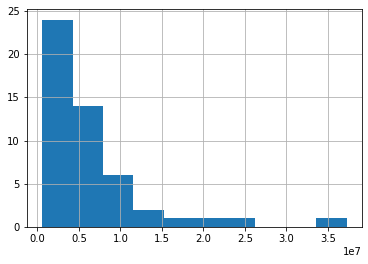

In [42]:
#Histograma
df.Population.hist() #bins = 10 por default

### Gráfica de densidad/Density plot

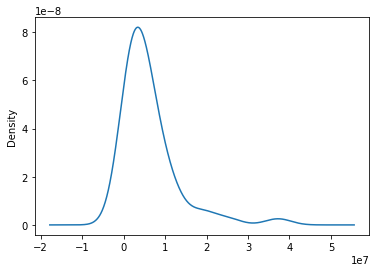

In [52]:
df.Population.plot.kde()

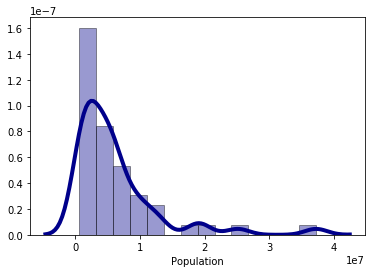

In [58]:
sns.distplot(df.Population, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

## Explorando datos categóricos y binarios

In [3]:
df = pd.read_csv("D:/Documentos/Python for Data Projects/datos_practical_statistics/airline_delay_causes.csv")

In [3]:
df.head()

year   month carrier            carrier_name airport  \
0  2003       6      AA  American Airlines Inc.     ABQ   
1  2003       6      AA  American Airlines Inc.     ANC   
2  2003       6      AA  American Airlines Inc.     ATL   
3  2003       6      AA  American Airlines Inc.     AUS   
4  2003       6      AA  American Airlines Inc.     BDL   

                                        airport_name  arr_flights  arr_del15  \
0  Albuquerque, NM: Albuquerque International Sun...        307.0       56.0   
1  Anchorage, AK: Ted Stevens Anchorage Internati...         90.0       27.0   
2  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        752.0      186.0   
3       Austin, TX: Austin - Bergstrom International        842.0      174.0   
4                Hartford, CT: Bradley International        383.0       55.0   

   carrier_ct   weather_ct  ...  late_aircraft_ct  arr_cancelled  \
0       14.68        10.79  ...              9.96            1.0   
1        7.09         2.00  ...              7.16            0.0   
2       33.99        27.82  ...             17.53            5.0   
3       60.24        20.54  ...             40.75            9.0   
4       14.90         8.91  ...             16.61            0.0   

   arr_diverted   arr_delay   carrier_delay  weather_delay  nas_delay  \
0           1.0      2530.0           510.0          621.0      676.0   
1           0.0      1390.0           271.0           83.0      581.0   
2           0.0      8314.0          1367.0         1722.0     3817.0   
3           1.0      8344.0          3040.0         1032.0     1835.0   
4           0.0      3137.0           815.0          574.0      555.0   

   security_delay  late_aircraft_delay  Unnamed: 21  
0            25.0                698.0          NaN  
1             0.0                455.0          NaN  
2           139.0               1269.0          NaN  
3           115.0               2322.0          NaN  
4             0.0               1193.0          NaN  

[5 rows x 22 columns]

In [14]:
df.drop('Unnamed: 21',axis=1,inplace=True)

In [15]:
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

### Gráfica de barras/Bar plot

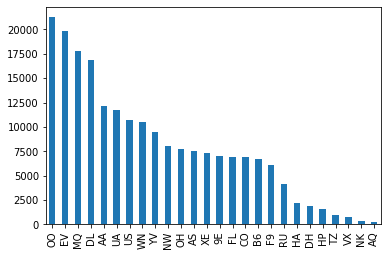

In [5]:
df.carrier.value_counts().plot(kind='bar')

### Moda/Mode
El valor que aparece más en los datos

In [16]:
df.carrier.mode()

0    OO
dtype: object

### Valor esperado/Expected value
"A	special	type	of	categorical	data	is	data	in	which	the	categories	represent	or	can be	mapped	to	discrete	values	on	the	same	scale"

### Correlación/Correlation
Si los altos valores de X van de la mano con altos valores de Y, estan correlacionados. Si bajos valores de X van con bajos valores de Y, estan negativamente correlacionados.

In [17]:
df.corr()

year     month  arr_flights  arr_del15  carrier_ct  \
year                 1.000000 -0.070099    -0.000845  -0.013529   -0.002851   
 month              -0.070099  1.000000     0.002180  -0.005000   -0.002680   
arr_flights         -0.000845  0.002180     1.000000   0.925824    0.878402   
arr_del15           -0.013529 -0.005000     0.925824   1.000000    0.903725   
carrier_ct          -0.002851 -0.002680     0.878402   0.903725    1.000000   
 weather_ct         -0.053464 -0.015769     0.593140   0.645277    0.695088   
nas_ct              -0.036714 -0.004020     0.822242   0.926373    0.744484   
security_ct         -0.058026  0.006659     0.477583   0.479298    0.503670   
late_aircraft_ct     0.017436 -0.004653     0.871023   0.922032    0.817553   
arr_cancelled       -0.005458 -0.041054     0.636879   0.713974    0.619467   
arr_diverted         0.013424 -0.006735     0.639059   0.663016    0.576669   
 arr_delay          -0.001245 -0.006910     0.883526   0.980645    0.864906   
 carrier_delay       0.019188 -0.005557     0.880581   0.906454    0.958219   
weather_delay       -0.038425 -0.017484     0.607051   0.670917    0.694774   
nas_delay           -0.030601 -0.003881     0.711100   0.852170    0.643771   
security_delay      -0.048278  0.006776     0.437425   0.436529    0.447263   
late_aircraft_delay  0.022712 -0.007007     0.845418   0.921080    0.800709   

                      weather_ct    nas_ct  security_ct  late_aircraft_ct  \
year                   -0.053464 -0.036714    -0.058026          0.017436   
 month                 -0.015769 -0.004020     0.006659         -0.004653   
arr_flights             0.593140  0.822242     0.477583          0.871023   
arr_del15               0.645277  0.926373     0.479298          0.922032   
carrier_ct              0.695088  0.744484     0.503670          0.817553   
 weather_ct             1.000000  0.557979     0.328136          0.493544   
nas_ct                  0.557979  1.000000     0.376600          0.747458   
security_ct             0.328136  0.376600     1.000000          0.468547   
late_aircraft_ct        0.493544  0.747458     0.468547          1.000000   
arr_cancelled           0.552508  0.670020     0.281446          0.651290   
arr_diverted            0.483025  0.607805     0.303241          0.624755   
 arr_delay              0.644349  0.923198     0.428728          0.898246   
 carrier_delay          0.701529  0.780538     0.432526          0.806828   
weather_delay           0.957485  0.581186     0.328588          0.540231   
nas_delay               0.507754  0.953006     0.313551          0.673935   
security_delay          0.297730  0.362870     0.874178          0.410561   
late_aircraft_delay     0.498314  0.770070     0.428025          0.980472   

                     arr_cancelled  arr_diverted   arr_delay   carrier_delay  \
year                     -0.005458      0.013424   -0.001245        0.019188   
 month                   -0.041054     -0.006735   -0.006910       -0.005557   
arr_flights               0.636879      0.639059    0.883526        0.880581   
arr_del15                 0.713974      0.663016    0.980645        0.906454   
carrier_ct                0.619467      0.576669    0.864906        0.958219   
 weather_ct               0.552508      0.483025    0.644349        0.701529   
nas_ct                    0.670020      0.607805    0.923198        0.780538   
security_ct               0.281446      0.303241    0.428728        0.432526   
late_aircraft_ct          0.651290      0.624755    0.898246        0.806828   
arr_cancelled             1.000000      0.507707    0.744926        0.662669   
arr_diverted              0.507707      1.000000    0.686447        0.620610   
 arr_delay                0.744926      0.686447    1.000000        0.900329   
 carrier_delay            0.662669      0.620610    0.900329        1.000000   
weather_delay             0.595915      0.539534    0.688977        0.721905   
nas_delay      

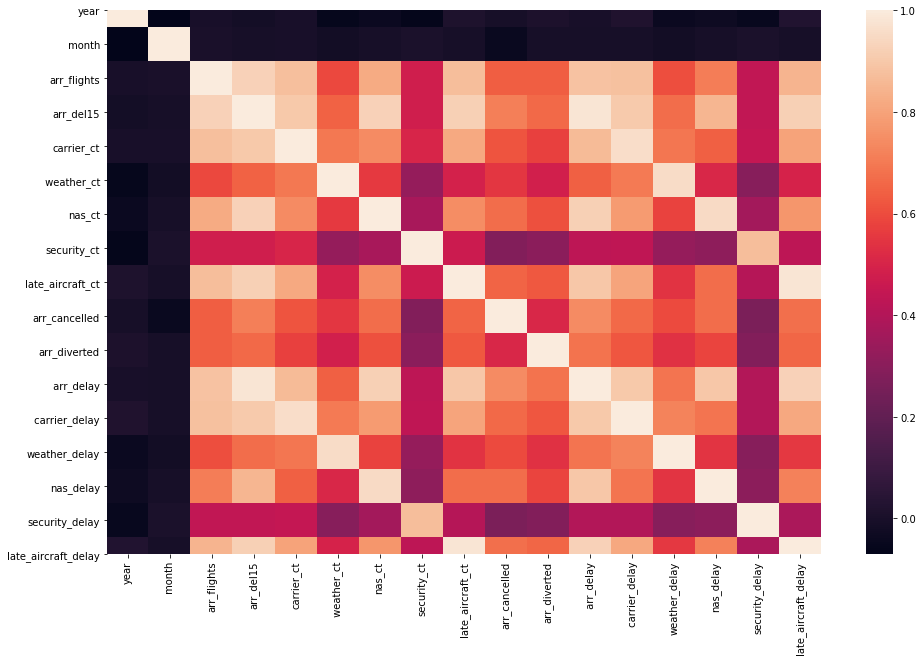

In [24]:
corr = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr);

### Gráfica de dispersión/Scatterplot
Para ver si existen correlaciones, sirve mucho

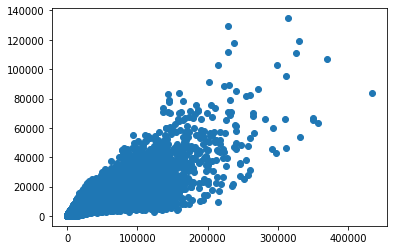

In [27]:
plt.scatter(df[' arr_delay'], df[' carrier_delay']);

## Explorando dos o más variables

In [28]:
df = pd.read_csv("D:/Documentos/Python for Data Projects/datos_practical_statistics/kc_tax.csv")

In [29]:
df.head()

TaxAssessedValue  SqFtTotLiving  ZipCode
0               NaN           1730  98117.0
1          206000.0           1870  98002.0
2          303000.0           1530  98166.0
3          361000.0           2000  98108.0
4          459000.0           3150  98108.0

In [30]:
df.shape

(498249, 3)

### Hexagonal binning and Contours

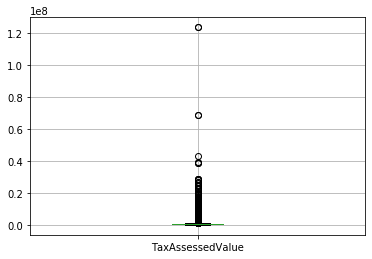

In [42]:
df.boxplot('TaxAssessedValue')

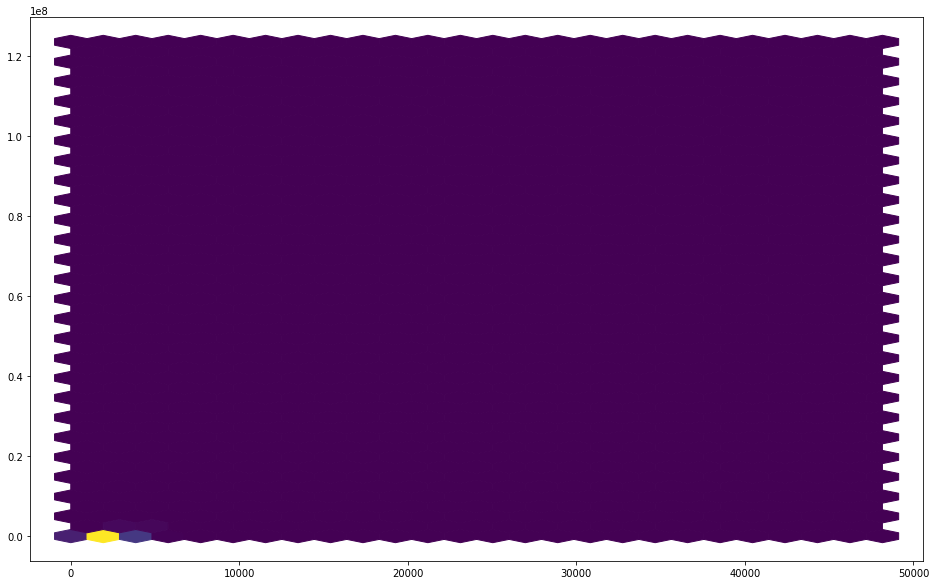

In [39]:
plt.figure(figsize=(16, 10))
plt.hexbin(x=df.SqFtTotLiving, y=df.TaxAssessedValue,gridsize=(25,25))

El boxplot demuestra la enorme cantidad de outliers que hay en la variable. Es por eso que el hexabin sale tan inservible...

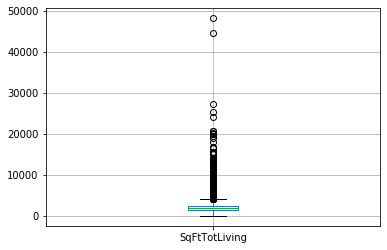

In [43]:
df.boxplot('SqFtTotLiving')

Igual acá...

In [51]:
df=df[(df.TaxAssessedValue < 750000) & (df.SqFtTotLiving > 100) & (df.SqFtTotLiving < 3500)]

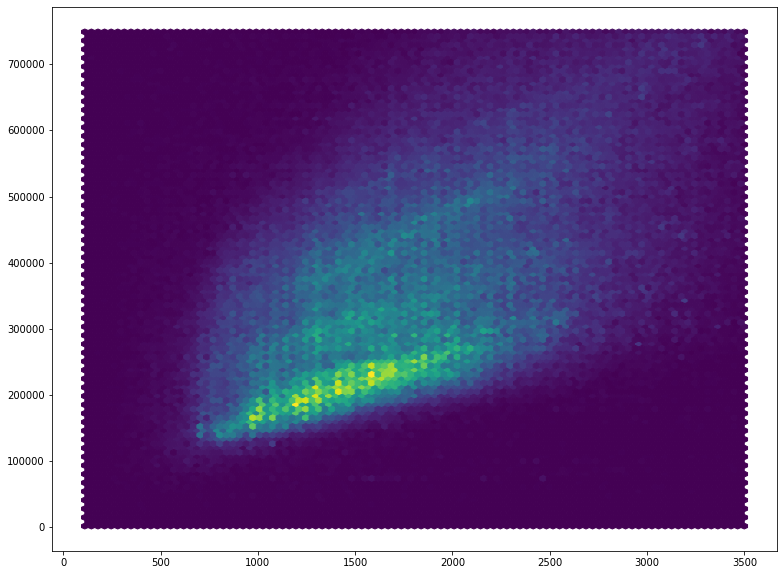

In [62]:
plt.figure(figsize=(13, 10))
plt.hexbin(x=df.SqFtTotLiving, y=df.TaxAssessedValue)

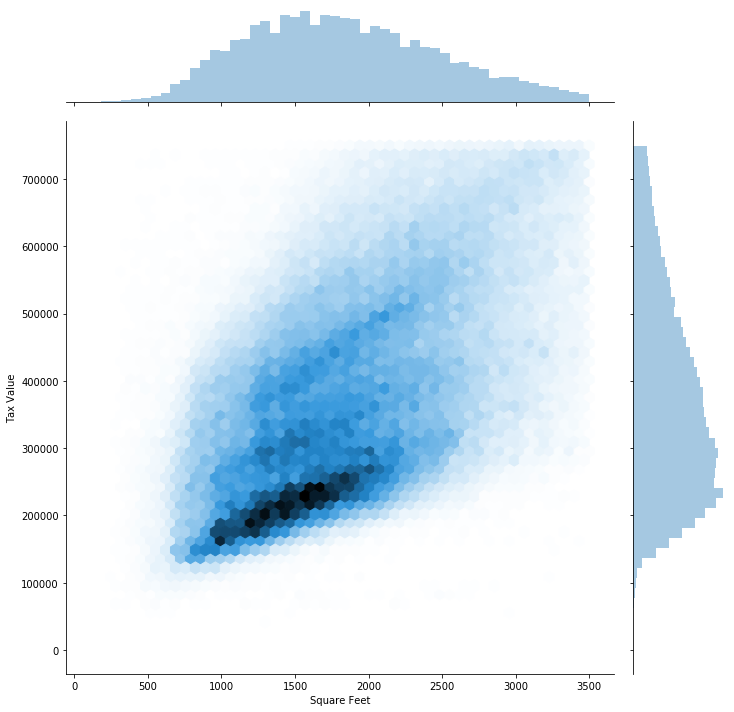

In [66]:
#plt.figure(figsize=(20, 10))
sns.jointplot(df.SqFtTotLiving, df.TaxAssessedValue, kind="hex",height=10).set_axis_labels("Square Feet", "Tax Value")

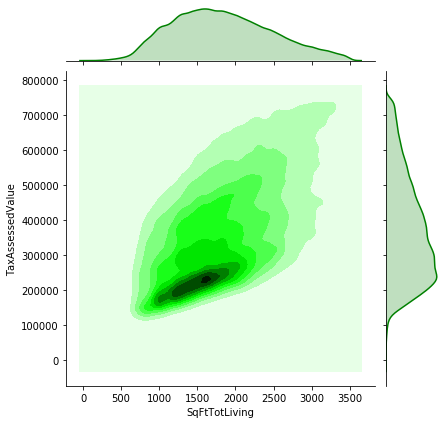

In [67]:
sns.jointplot("SqFtTotLiving", "TaxAssessedValue", data=df, kind="kde", color="g")
#https://seaborn.pydata.org/generated/seaborn.jointplot.html

### Dos variables categóricas
Tabla de contingencia (crosstable)

In [68]:
df = pd.read_csv("D:/Documentos/Python for Data Projects/datos_practical_statistics/lc_loans.csv")

In [69]:
df.head()

status grade
0   Fully Paid     B
1  Charged Off     C
2   Fully Paid     C
3   Fully Paid     C
4      Current     B

In [71]:
pd.crosstab(df.grade, df.status)

status  Charged Off  Current  Fully Paid  Late
grade                                         
A              1562    50051       20408   469
B              5302    93852       31160  2056
C              6023    88928       23147  2777
D              5007    53281       13681  2308
E              2842    24639        5949  1374
F              1526     8444        2328   606
G               409     1990         643   199

### Categóricas y númericas

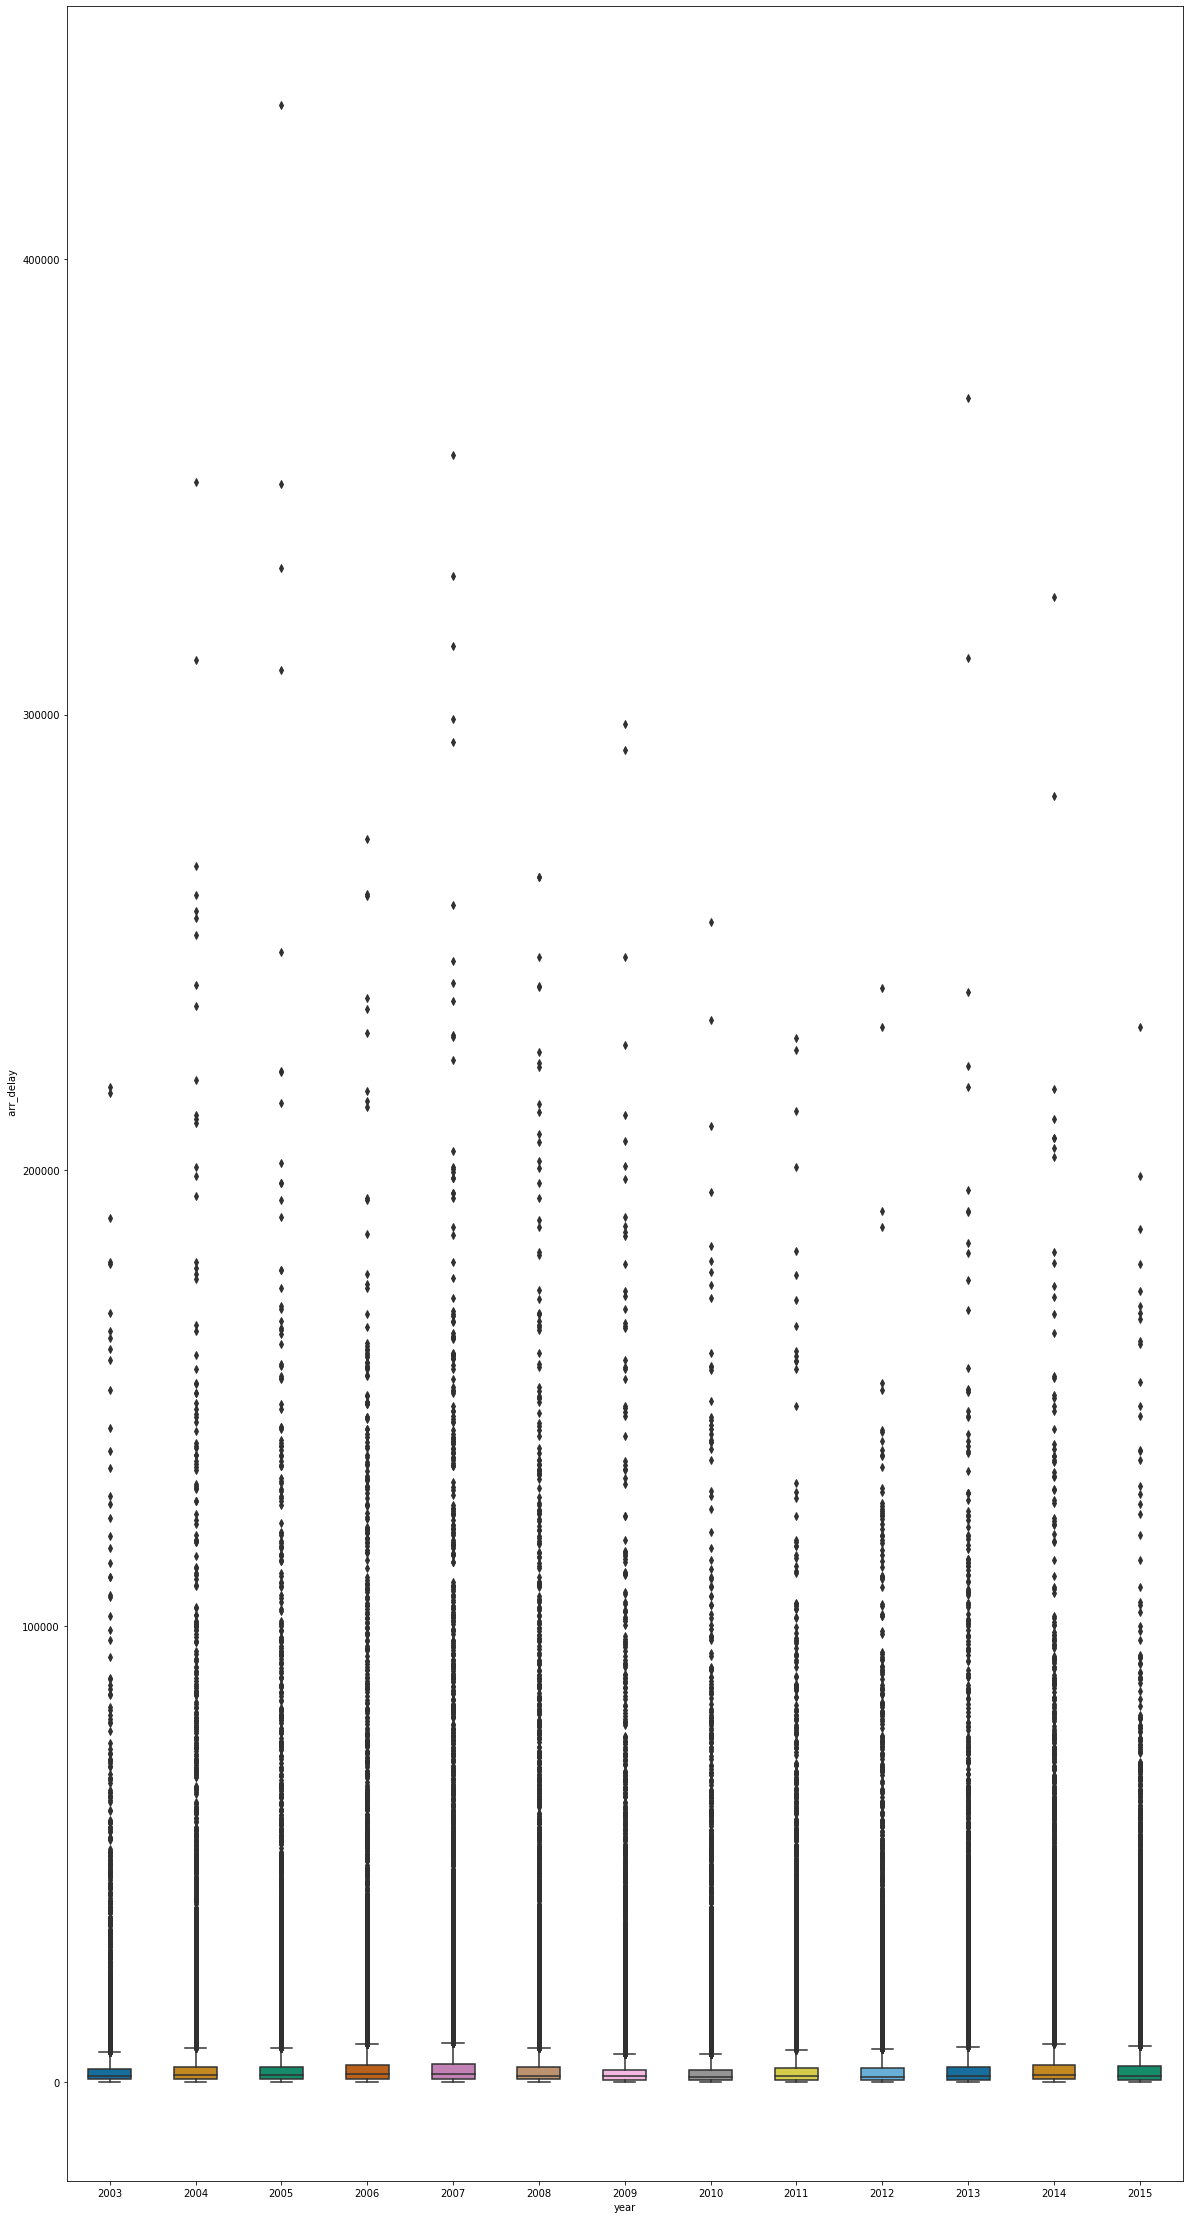

In [85]:
df = pd.read_csv("D:/Documentos/Python for Data Projects/datos_practical_statistics/airline_delay_causes.csv")
plt.figure(figsize=(20, 40))
sns.boxplot(x=df.year, y=df[' arr_delay'],  
                 width=0.5,
                 palette="colorblind")

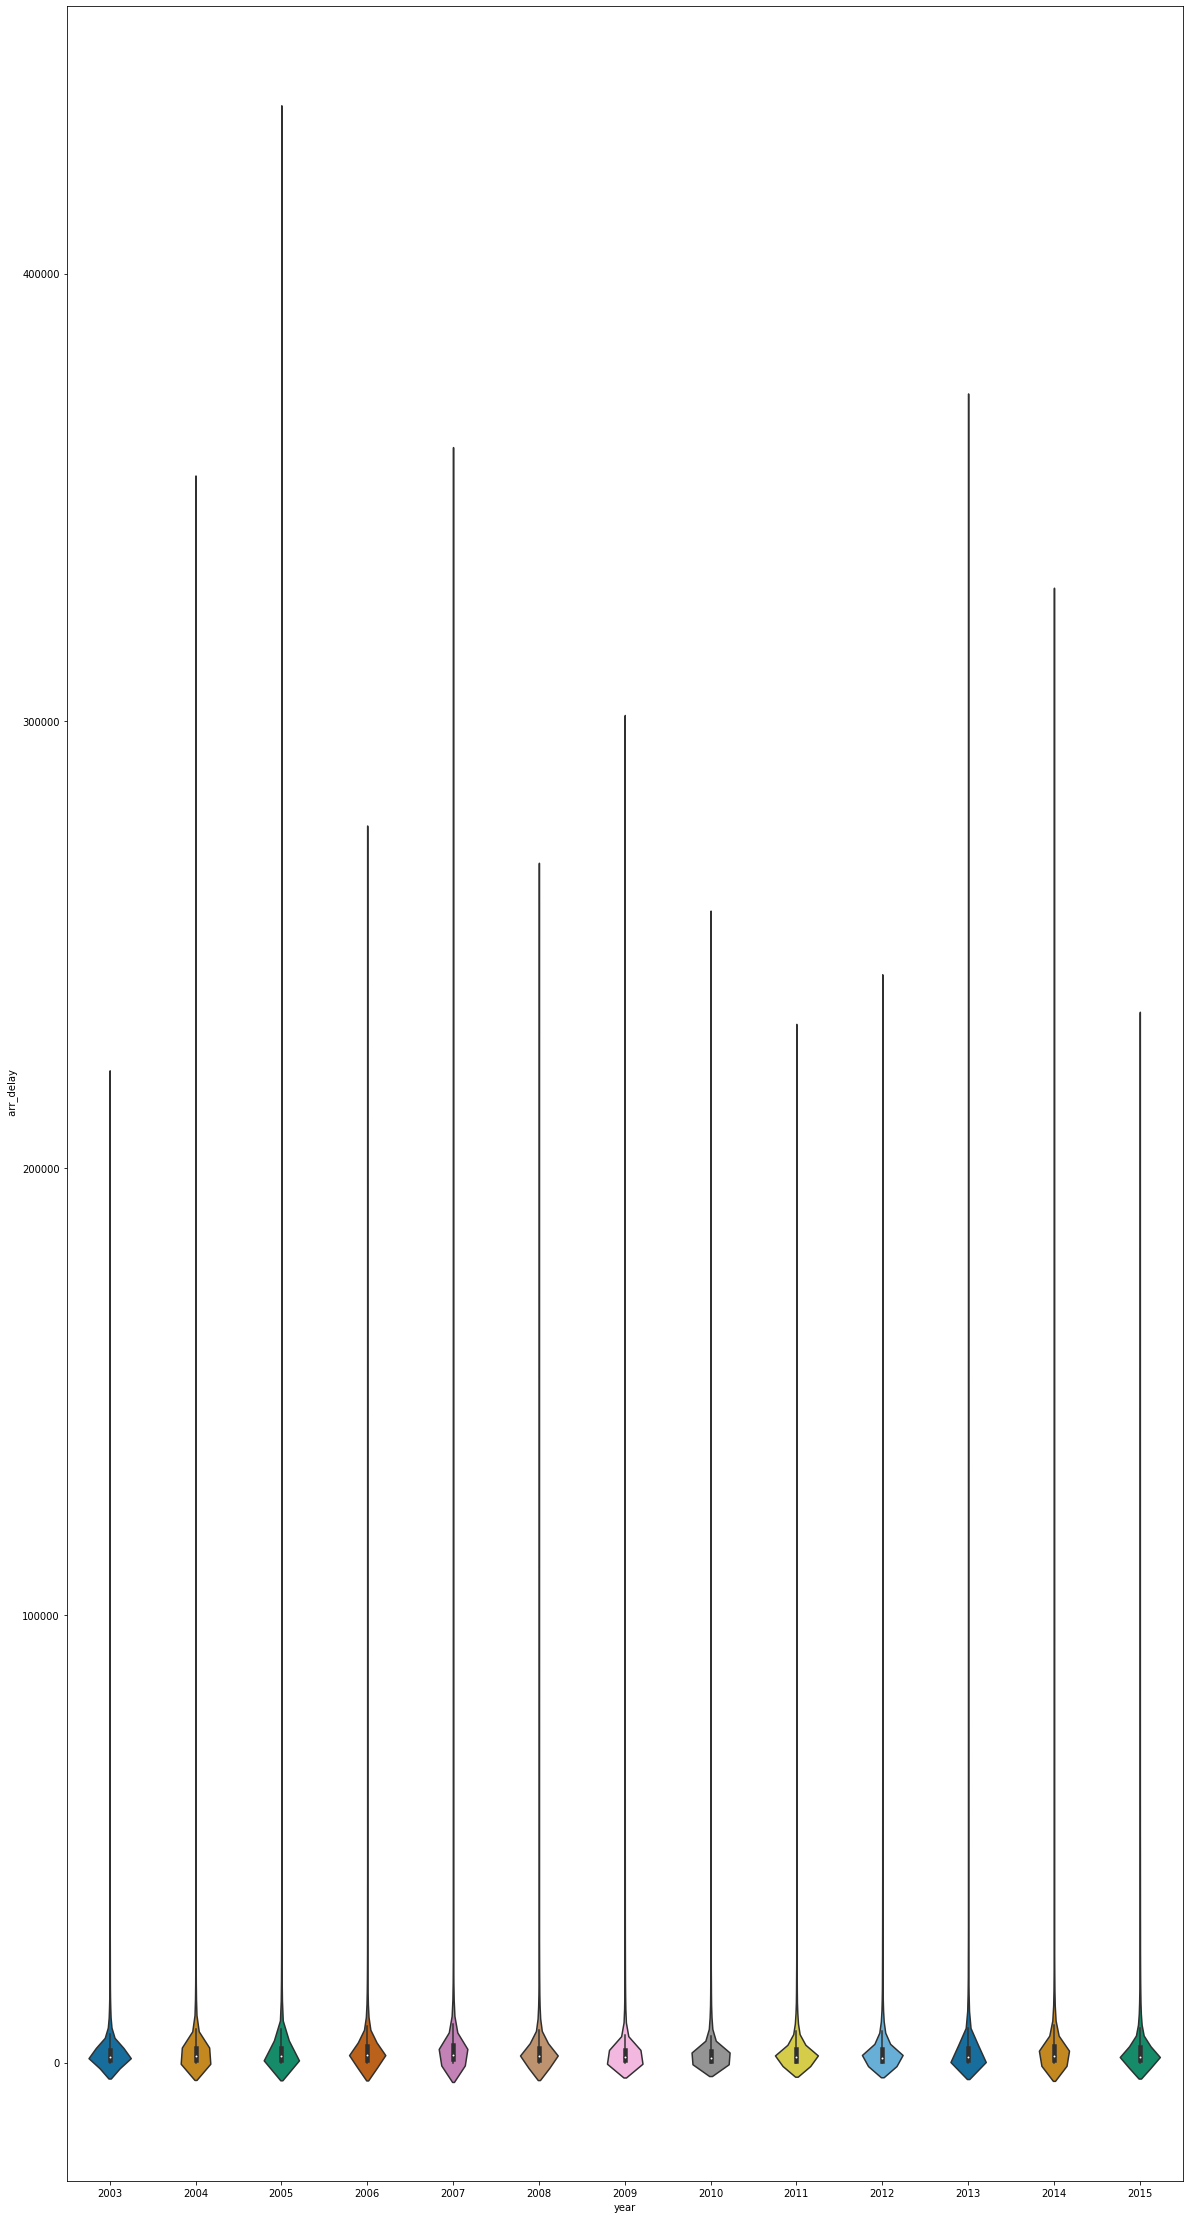

In [87]:
plt.figure(figsize=(20, 40))
sns.violinplot(x=df.year, y=df[' arr_delay'],  
                 width=0.5,
                 palette="colorblind")

### Visualizando múltiples variables

In [88]:
df = pd.read_csv("D:/Documentos/Python for Data Projects/datos_practical_statistics/kc_tax.csv")

In [92]:
df=df[df.ZipCode.isin([98188,98105,98108,98126])]

In [105]:
import plotly.express as px

In [107]:
px.scatter(df, x="SqFtTotLiving", y="TaxAssessedValue", facet_col="ZipCode")